In [263]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import datetime
from IPython.display import display
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [65]:
sales = pd.read_csv('sales.csv')
sales = sales.rename(columns={'datetime':'date_time'})

In [636]:
sales.head()

,date_time,year,month,day,avg_state_bottle_retail,avg_bottles_sold,avg_amount_retail_paid_total,avg_profit_per_bottle,avg_state_profit_total_bottle,total_amount_sales,total_amount_volumes
0,2018-01-02,2018,1,2,14.838906,7.873706,116.837188,4.947709,32.337754,970359.0,64844.59
1,2018-01-03,2018,1,3,15.517889,9.110889,141.381767,5.174080,40.192927,1201497.8,77756.80
2,2018-01-04,2018,1,4,15.333807,10.413375,159.676678,5.112699,46.581505,1078340.1,65508.58
3,2018-01-05,2018,1,5,15.212484,8.794437,133.785226,5.072302,36.550205,551381.0,35299.17
4,2018-01-08,2018,1,8,14.928870,9.439040,140.914209,4.977759,39.226957,1617772.2,102917.41


In [637]:
print(sales.max())

date_time                        2021-03-31 00:00:00
year                                            2021
month                                             12
day                                               31
avg_state_bottle_retail                    50.523684
avg_bottles_sold                              1190.0
avg_amount_retail_paid_total                24317.65
avg_profit_per_bottle                      16.843158
avg_state_profit_total_bottle                6503.47
total_amount_sales                         3097698.0
total_amount_volumes                       169140.51
dtype: object


In [104]:
temp = pd.read_csv('temperature-precipiration.csv')

In [105]:
temp.head()

,date_time,year,mo,da,total_precipitation,lat,lon,avg_temp
0,20180101,2018,1,1,0.0,42.391,-96.379,-26.83
1,20180102,2018,1,2,0.0,42.391,-96.379,-21.89
2,20180103,2018,1,3,0.0,42.391,-96.379,-10.33
3,20180104,2018,1,4,0.0,42.391,-96.379,-16.28
4,20180105,2018,1,5,0.0,42.391,-96.379,-11.94


In [638]:
temp.max()

date_time              2021-05-04 00:00:00
year                                  2021
mo                                      12
da                                      31
total_precipitation                   3.04
lat                                 42.391
lon                                -96.379
avg_temp                             30.33
avg_temp_mavg14                       25.9
dtype: object

In [106]:
sales['date_time']= pd.to_datetime(sales['date_time'],format='%Y%m%d')
temp['date_time']= pd.to_datetime(temp['date_time'],format='%Y%m%d')

In [107]:
sales.head()

,date_time,year,month,day,avg_state_bottle_retail,avg_bottles_sold,avg_amount_retail_paid_total,avg_profit_per_bottle,avg_state_profit_total_bottle,total_amount_sales,total_amount_volumes
0,2018-01-02,2018,1,2,14.838906,7.873706,116.837188,4.947709,32.337754,970359.0,64844.59
1,2018-01-03,2018,1,3,15.517889,9.110889,141.381767,5.174080,40.192927,1201497.8,77756.80
2,2018-01-04,2018,1,4,15.333807,10.413375,159.676678,5.112699,46.581505,1078340.1,65508.58
3,2018-01-05,2018,1,5,15.212484,8.794437,133.785226,5.072302,36.550205,551381.0,35299.17
4,2018-01-08,2018,1,8,14.928870,9.439040,140.914209,4.977759,39.226957,1617772.2,102917.41


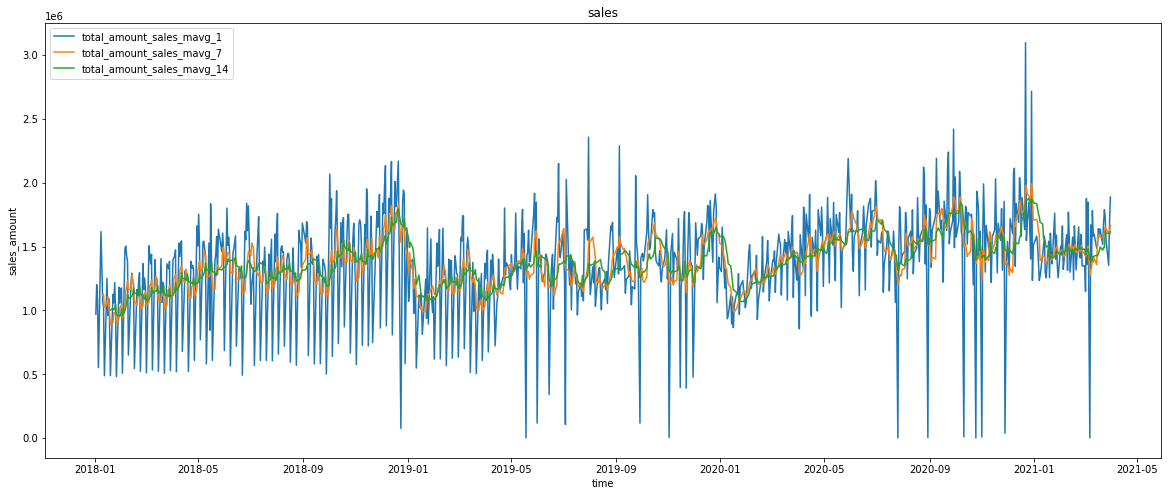

In [593]:
# graph
fig = plt.figure(figsize=(20, 8))

plt.title("sales")
plt.xlabel("time")
plt.ylabel("sales_amount")

plt.plot(sales["date_time"], sales["total_amount_sales"].rolling(1).mean().round(1), label="total_amount_sales_mavg_1")
plt.plot(sales["date_time"], sales["total_amount_sales"].rolling(7).mean().round(1), label="total_amount_sales_mavg_7")
plt.plot(sales["date_time"], sales["total_amount_sales"].rolling(14).mean().round(1), label="total_amount_sales_mavg_14")
plt.legend()
plt.show()

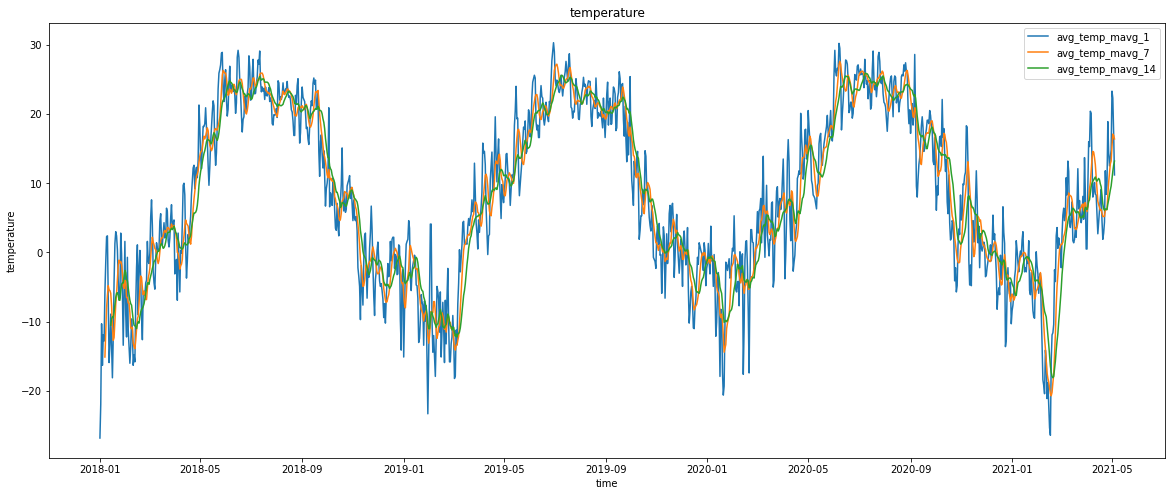

In [594]:
# graph
fig = plt.figure(figsize=(20, 8))

plt.title("temperature")
plt.xlabel("time")
plt.ylabel("temperature")

plt.plot(temp["date_time"], temp["avg_temp"].rolling(1).mean().round(1), label="avg_temp_mavg_1")
plt.plot(temp["date_time"], temp["avg_temp"].rolling(7).mean().round(1), label="avg_temp_mavg_7")
plt.plot(temp["date_time"], temp["avg_temp"].rolling(14).mean().round(1), label="avg_temp_mavg_14")
plt.legend()
plt.show()

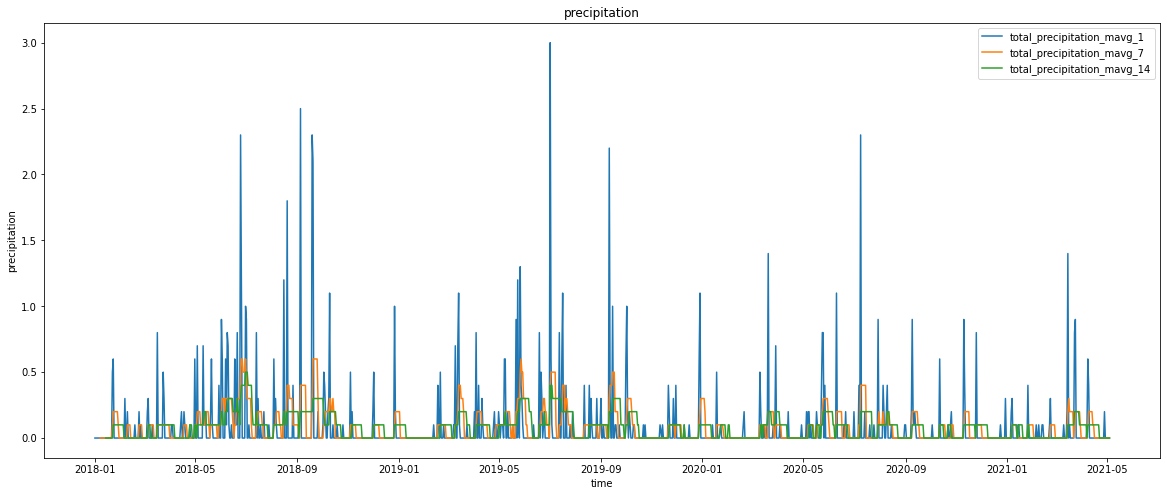

In [595]:
# graph
fig = plt.figure(figsize=(20, 8))

plt.title("precipitation")
plt.xlabel("time")
plt.ylabel("precipitation")

plt.plot(temp["date_time"], temp["total_precipitation"].rolling(1).mean().round(1), label="total_precipitation_mavg_1")
plt.plot(temp["date_time"], temp["total_precipitation"].rolling(7).mean().round(1), label="total_precipitation_mavg_7")
plt.plot(temp["date_time"], temp["total_precipitation"].rolling(14).mean().round(1),label="total_precipitation_mavg_14")
plt.legend()
plt.show()

In [596]:
data.head()

,date_time,total_amount_sales,avg_temp,total_precipitation,ds,y
6,2018-01-10,1.117242e+06,-8.151429,0.000000,2018-01-10,1.117242e+06
7,2018-01-11,1.125912e+06,-6.000000,0.000000,2018-01-11,1.125912e+06
8,2018-01-12,1.023969e+06,-6.794286,0.004286,2018-01-12,1.023969e+06
9,2018-01-15,1.048808e+06,-6.405714,0.011429,2018-01-15,1.048808e+06
10,2018-01-16,1.107179e+06,-7.280000,0.011429,2018-01-16,1.107179e+06


In [616]:
data = pd.merge(sales[["date_time","total_amount_sales"]],temp[["date_time","avg_temp","total_precipitation"]],on="date_time",how="left")
original = data

In [673]:
rolling_num = 14
data["total_amount_sales"] = data["total_amount_sales"].rolling(rolling_num).mean()
data["avg_temp"] = data["avg_temp"].rolling(rolling_num).mean()
data["total_precipitation"] = data["total_precipitation"].rolling(rolling_num).mean()

<ipython-input-673-6e65f2f6c4cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["total_amount_sales"] = data["total_amount_sales"].rolling(rolling_num).mean()
<ipython-input-673-6e65f2f6c4cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["avg_temp"] = data["avg_temp"].rolling(rolling_num).mean()
<ipython-input-673-6e65f2f6c4cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [674]:
data.isnull().sum()

date_time               0
total_amount_sales     13
avg_temp               13
total_precipitation    13
ds                      0
y                       0
dtype: int64

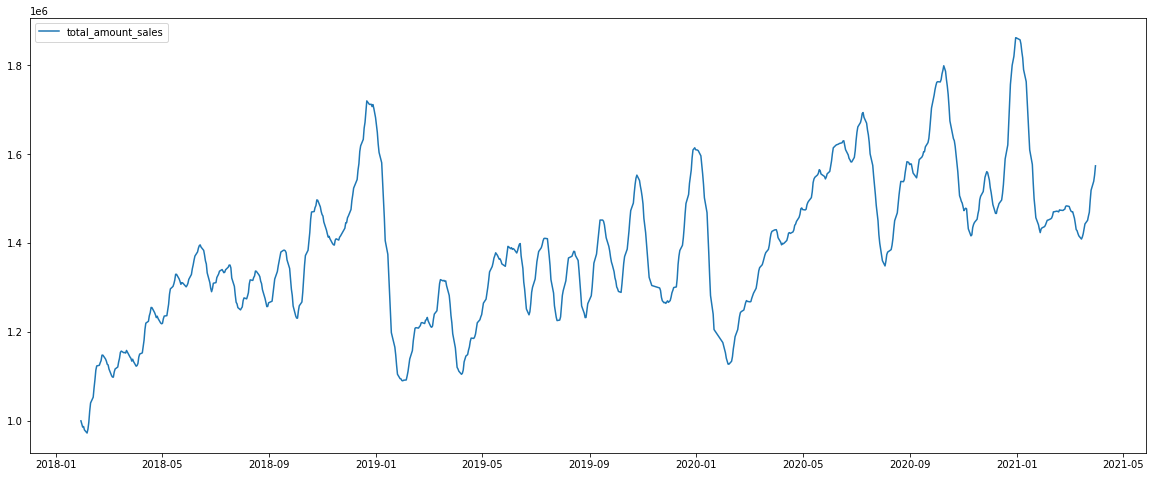

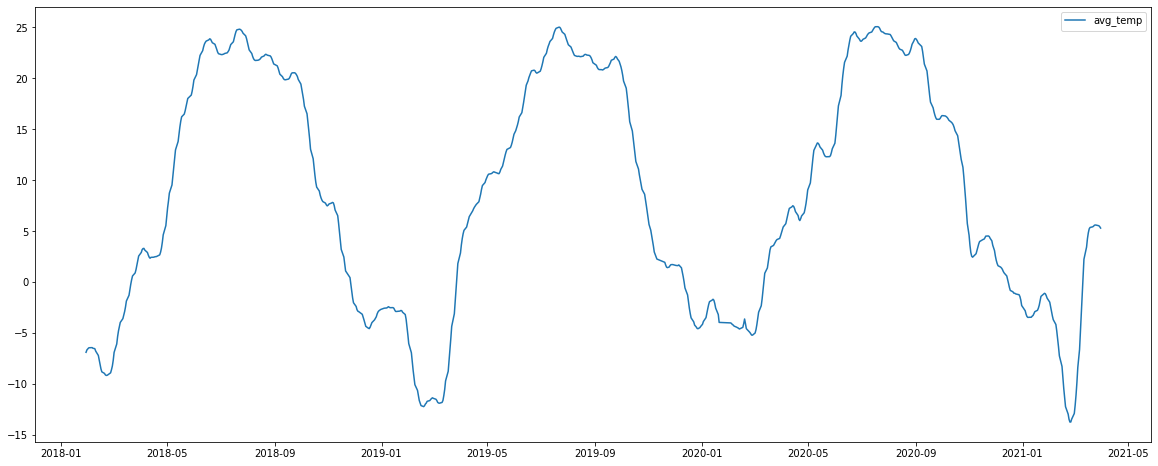

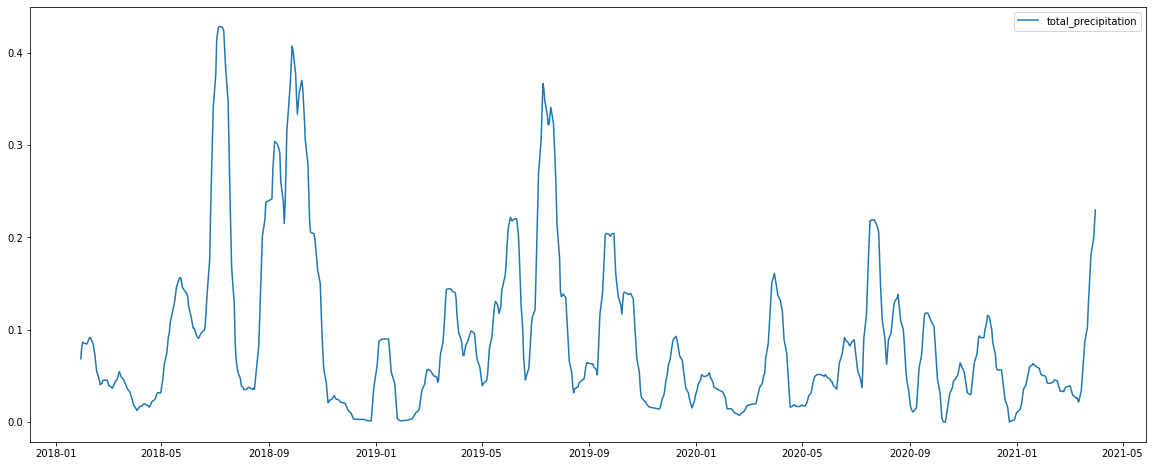

In [675]:
fig = plt.figure(figsize=(20, 8))
plt.plot(data["date_time"], data["total_amount_sales"], label="total_amount_sales")
plt.legend()
plt.show()

fig = plt.figure(figsize=(20, 8))
plt.plot(data["date_time"], data["avg_temp"], label="avg_temp")
plt.legend()
plt.show()

fig = plt.figure(figsize=(20, 8))
plt.plot(data["date_time"], data["total_precipitation"],label="total_precipitation")
plt.legend()
plt.show()

In [676]:
data = data.dropna()
p_data = data
print('max_date',p_data['date_time'].max())
print('min_date',p_data['date_time'].min())

max_date 2021-03-31 00:00:00
min_date 2018-01-29 00:00:00


In [677]:
p_data["ds"] = pd.to_datetime(data["date_time"])
p_data["ds"] = pd.to_datetime(p_data["ds"])
p_data["y"] = data["total_amount_sales"]
p_data = p_data.loc[:,["ds","y","avg_temp","total_precipitation"]]

In [678]:
# 予測したい数
predict_num = 60
# 訓練データの作成する。全データから予測したい数を引いた数
cnt = len(p_data) - predict_num
train_df = p_data[:cnt]
print(train_df)

            ds             y  avg_temp  total_precipitation
19  2018-01-29  1.000703e+06 -6.876020             0.068571
20  2018-01-30  9.937656e+05 -6.640612             0.080102
21  2018-01-31  9.866508e+05 -6.546939             0.086429
22  2018-02-01  9.880172e+05 -6.445816             0.086122
23  2018-02-02  9.803628e+05 -6.426939             0.085306
..         ...           ...       ...                  ...
782 2020-12-31  1.861237e+06 -2.288980             0.010000
783 2021-01-04  1.857145e+06 -2.800612             0.013469
784 2021-01-05  1.848033e+06 -3.137143             0.016224
785 2021-01-06  1.830691e+06 -3.360408             0.020612
786 2021-01-07  1.816731e+06 -3.455510             0.028061

[754 rows x 4 columns]


In [679]:
# モデルの作成
model = Prophet(
    growth='linear', #logistic
    yearly_seasonality = True,
    weekly_seasonality = True,
    daily_seasonality = True,
    changepoints = None,
    changepoint_range = 0.95, # 傾向変化点の候補の幅で先頭からの割合。
    changepoint_prior_scale = 0.5, # 傾向変化点の事前分布のスケール値。パラメータの柔軟性
    n_changepoints = 5 # 傾向変化点の数

) 

# 学習
model.fit(train_df)

# 予測データの作成
# pred = model.predict(test)
# pred.head()

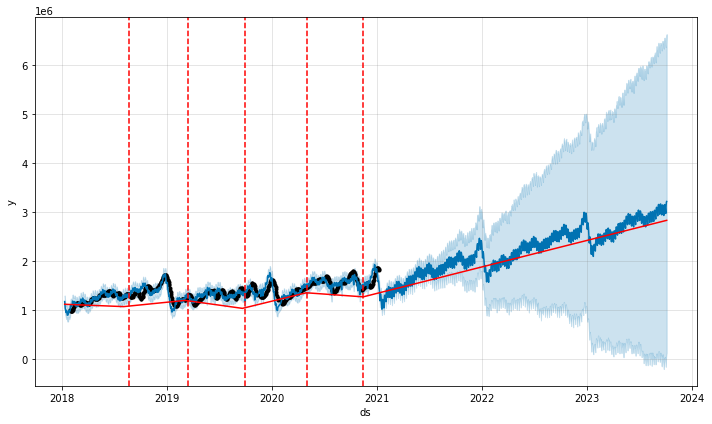

In [680]:
import matplotlib.pyplot as plt
from fbprophet.plot  import add_changepoints_to_plot

# forecast['cap'] = 500000
fig1 = model.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), model, forecast)
plt.show()

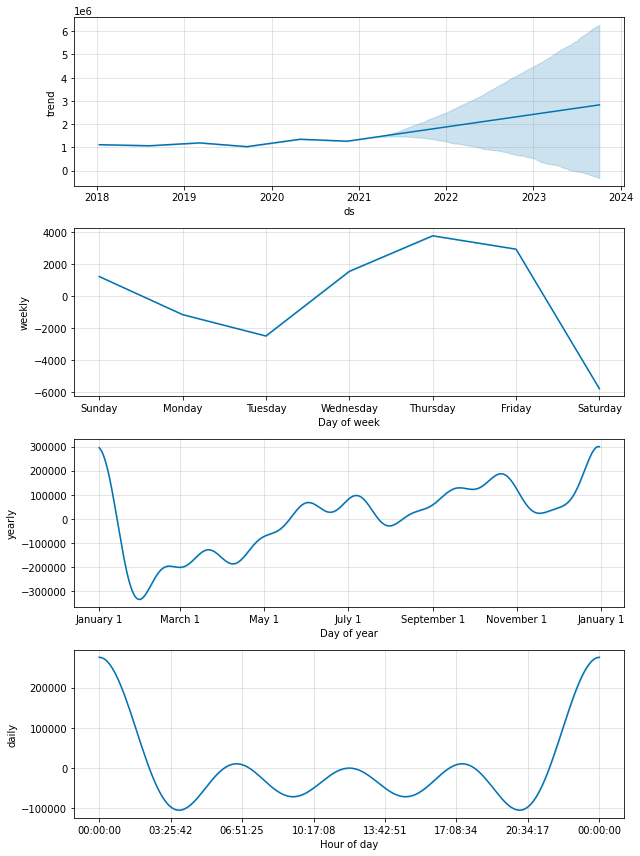

In [681]:
fig2 = model.plot_components(forecast)
plt.show()

             ds             y   avg_temp  total_precipitation  delta
162  2018-08-20  1.328869e+06  22.191224             0.083061  0.649
305  2019-03-14  1.309086e+06 -10.523469             0.058571 -1.023
448  2019-09-29  1.336147e+06  21.665612             0.204082  1.529
605  2020-05-01  1.475634e+06   9.048776             0.017653 -1.297
748  2020-11-13  1.446651e+06   3.984490             0.064490  0.960


<ipython-input-682-cfe9b0c12004>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['delta'] = model.params['delta'].ravel()
<ipython-input-682-cfe9b0c12004>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ds'] = df3['ds'].astype(str)
<ipython-input-682-cfe9b0c12004>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

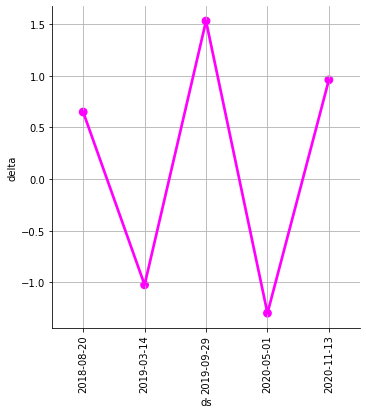

In [682]:
# 変化点をグラフ化
import matplotlib.pyplot as plt

# 変化率を追記
df3 = train_df.iloc[model.changepoints.index]
df3['delta'] = model.params['delta'].ravel()

# 変化点を取得
df3['ds'] = df3['ds'].astype(str)
df3['delta'] = df3['delta'].round(3)
df4 = df3[df3['delta'] != 0]
print(df4)

ax = sns.factorplot(x = 'ds', y = 'delta', data = df4, color='magenta')
ax.set_xticklabels(rotation=90)
plt.grid()
plt.show()
# 変化点をリストで抽出
ds_list = df4['ds'].tolist()

In [683]:
model2 = Prophet(
    growth='linear', # 傾向変動の関数．非線形は'logistic'
    yearly_seasonality = True, # 年次の季節変動を考慮有無
    weekly_seasonality = True, # 週次の季節変動を考慮有無
    daily_seasonality = True, # 日次の季節変動を考慮有無
    changepoints = ds_list, #  傾向変化点のリスト
    #changepoint_range = 0.85, # 傾向変化点の候補の幅で先頭からの割合。
    #changepoint_prior_scale = 0.5, # 傾向変化点の事前分布のスケール値。パラメータの柔軟性
    #n_changepoints = 5, # 傾向変化点の数
) 
model2.fit(train_df)

In [689]:
future = model2.make_future_dataframe(365)

In [690]:
forecast = model.predict(future)

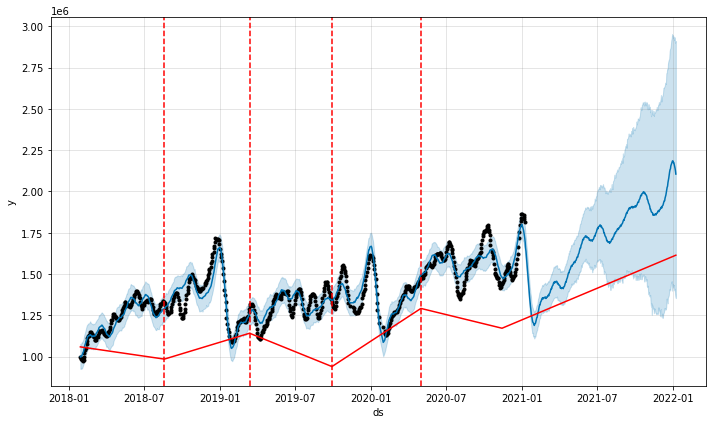

In [691]:
# 可視化

fig2_1 = model2.plot(forecast)
b = add_changepoints_to_plot(fig2_1.gca(), model2, forecast)
plt.show()

In [692]:
pred_prophet = forecast.loc[:,["ds","yhat"]]

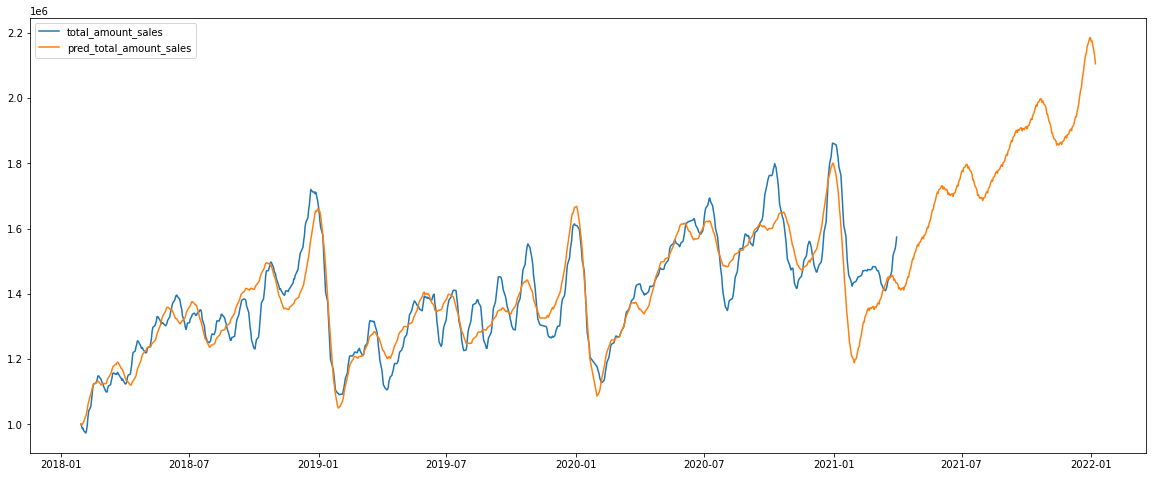

In [693]:
fig = plt.figure(figsize=(20, 8))

plt.plot(data["date_time"], data["total_amount_sales"], label="total_amount_sales")
plt.plot(pred_prophet["ds"],pred_prophet["yhat"], label="pred_total_amount_sales")
plt.legend()
plt.show()